<a href="https://colab.research.google.com/github/GovindSinghShekhawat/NeuaralNetworks/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('/content/pima-indians-diabetes.csv', names=['Number of times pregnent','Plasma glucose','Diastolic blood pressure',
                        'Triceps skinfold thickness','serum insulin','Body mass index','Diabetes pedigree function','Age','Class'])

In [3]:
dataset.head(2)

,Number of times pregnent,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
dataset.describe(include='all')

,Number of times pregnent,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


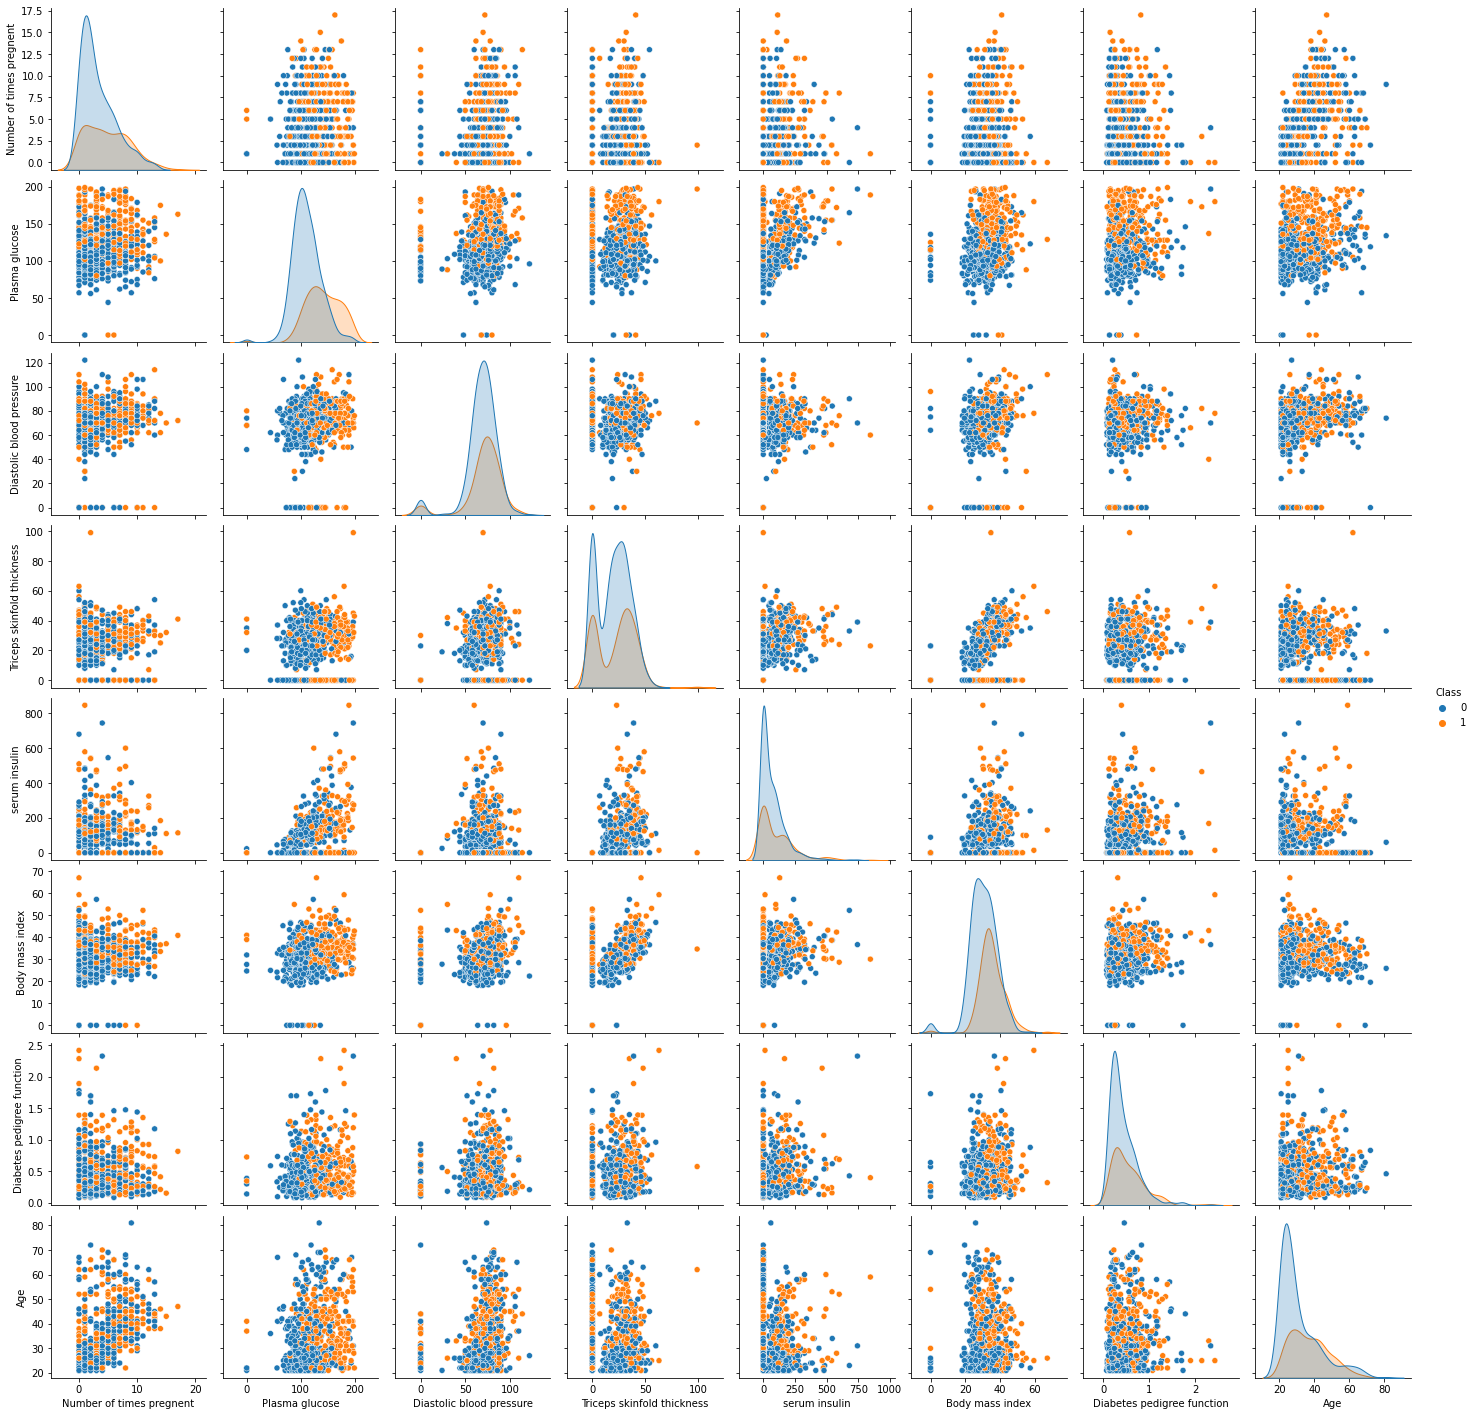

In [5]:
sns.pairplot(dataset, hue='Class')

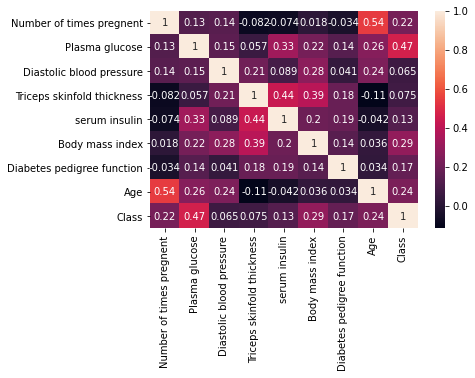

In [6]:
sns.heatmap(dataset.corr(), annot=True)

In [7]:
# Creating input features and target variables
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

In [8]:
X.head(2)

,Number of times pregnent,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [9]:
# Standardinzing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [11]:
from keras import Sequential
from keras.layers import Dense

In [12]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation = 'relu',
                     kernel_initializer='random_normal',input_dim=8))
#Second Hidden Layer
classifier.add(Dense(4, activation = 'relu',
                     kernel_initializer = 'random_normal'))
#Output Layer
classifier.add(Dense(1,activation='sigmoid',
                     kernel_initializer='random_normal'))

In [13]:
#Compliling the neural network
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
#Fitting the data to the training dataset
classifier.fit(X_train, Y_train, batch_size=10, epochs=100)

Epoch 1/100
54/54 [==============================] - 1s 937us/step - loss: 0.6920 - accuracy: 0.6313
Epoch 2/100
54/54 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.6123
Epoch 3/100
54/54 [==============================] - 0s 902us/step - loss: 0.6713 - accuracy: 0.6639
Epoch 4/100
54/54 [==============================] - 0s 907us/step - loss: 0.6495 - accuracy: 0.6428
Epoch 5/100
54/54 [==============================] - 0s 945us/step - loss: 0.6126 - accuracy: 0.6411
Epoch 6/100
54/54 [==============================] - 0s 995us/step - loss: 0.5782 - accuracy: 0.6709
Epoch 7/100
54/54 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.7318
Epoch 8/100
54/54 [==============================] - 0s 919us/step - loss: 0.5429 - accuracy: 0.7200
Epoch 9/100
54/54 [==============================] - 0s 970us/step - loss: 0.5495 - accuracy: 0.7481
Epoch 10/100
54/54 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.

In [15]:
eval_model = classifier.evaluate(X_train,Y_train)
eval_model

17/17 [==============================] - 0s 1ms/step - loss: 0.4616 - accuracy: 0.7579


[0.46156036853790283, 0.7579143643379211]

In [16]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)

[[136  23]
 [ 23  49]]
